In [ ]:
from google.colab import files

In [2]:
file = files.upload()

Saving homeprices.csv to homeprices.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import io
df = pd.read_csv(io.BytesIO(file["homeprices.csv"]))

In [73]:
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


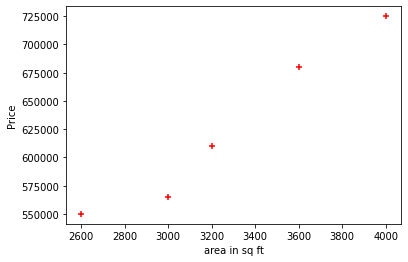

In [9]:
plt.xlabel("area in sq ft")
plt.ylabel("Price")
plt.scatter(df.area, df.price, color="red", marker="+")

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
df.price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [27]:
df[["area"]]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [30]:
lr.fit(df[['area']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr.predict([[3300]])

array([628715.75342466])

In [33]:
lr.coef_ #m value

array([135.78767123])

In [34]:
lr.intercept_ # intercept

180616.43835616432

In [36]:
lr.coef_ * 3300 + lr.intercept_ # Calculation

array([628715.75342466])

In [38]:
#checking the values for areas
upload_areas = files.upload()

Saving areas.csv to areas (1).csv


In [39]:
areas = pd.read_csv(io.BytesIO(upload_areas["areas.csv"]))

In [40]:
areas

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [44]:
p = lr.predict(areas)

In [45]:
areas["prices"] = p

In [46]:
areas

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [47]:
areas.to_csv("predicted_values.csv")

#  Plotting the Line



In [62]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [75]:
predicted = areas.prices[0:5]

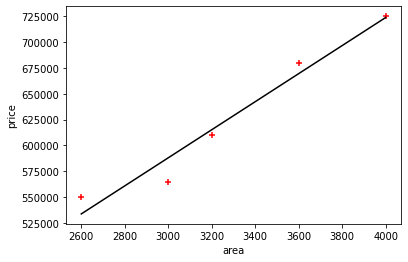

In [83]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area, df.price, color="red", marker="+")
plt.plot(df.area, lr.predict(df[["area"]]), color="black")